Copyright &copy; 1997-2005 The R Core Team

In [1]:
## Adaptive integration:	 Venables and Ripley pp. 105-110
## This is the basic integrator.

area <- function(f, a, b, ..., fa = f(a, ...), fb = f(b, ...), limit
                 = 10, eps = 1.e-5)
{
    h <- b - a
    d <- (a + b)/2
    fd <- f(d, ...)
    a1 <- ((fa + fb) * h)/2
    a2 <- ((fa + 4 * fd + fb) * h)/6
    if(abs(a1 - a2) < eps)
        return(a2)
    if(limit == 0) {
        warning(paste("iteration limit reached near x = ",
              d))
        return(a2)
    }
    area(f, a, d, ..., fa = fa, fb = fd, limit = limit - 1,
         eps = eps) + area(f, d, b, ..., fa = fd, fb =
         fb, limit = limit - 1, eps = eps)
}


## The function to be integrated

fbeta <- function(x, alpha, beta)
{
    x^(alpha - 1) * (1 - x)^(beta - 1)
}


## Compute the approximate integral, the exact integral and the error

b0 <- area(fbeta, 0, 1, alpha=3.5, beta=1.5)
b1 <- exp(lgamma(3.5) + lgamma(1.5) - lgamma(5))
c(b0, b1, b0-b1)

[1]  1.227170e-01  1.227185e-01 -1.443996e-06

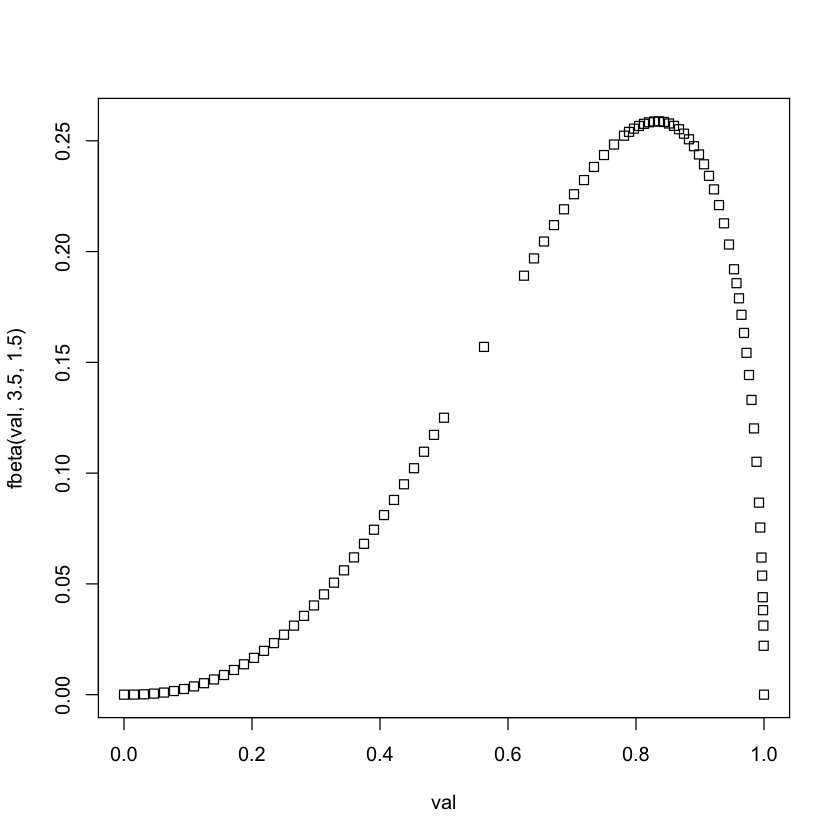

In [2]:
## Modify the function so that it records where it was evaluated

fbeta.tmp <- function (x, alpha, beta)
{
    val <<- c(val, x)
    x^(alpha - 1) * (1 - x)^(beta - 1)
}

## Recompute and plot the evaluation points.

val <- NULL
b0 <- area(fbeta.tmp, 0, 1, alpha=3.5, beta=1.5)
plot(val, fbeta(val, 3.5, 1.5), pch=0)

In [3]:
## Better programming style -- renaming the function will have no effect.
## The use of "Recall" as in V+R is VERY black magic.  You can get the
## same effect transparently by supplying a wrapper function.
## This is the approved Abelson+Sussman method.

area <- function(f, a, b, ..., limit=10, eps=1e-5) {
    area2 <- function(f, a, b, ..., fa = f(a, ...), fb = f(b, ...),
		      limit = limit, eps = eps) {
	h <- b - a
	d <- (a + b)/2
	fd <- f(d, ...)
	a1 <- ((fa + fb) * h)/2
	a2 <- ((fa + 4 * fd + fb) * h)/6
	if(abs(a1 - a2) < eps)
	    return(a2)
	if(limit == 0) {
	    warning(paste("iteration limit reached near x =", d))
	    return(a2)
	}
	area2(f, a, d, ..., fa = fa, fb = fd, limit = limit - 1,
	      eps = eps) + area2(f, d, b, ..., fa = fd, fb =
	      fb, limit = limit - 1, eps = eps)
    }
    area2(f, a, b, ..., limit=limit, eps=eps)
}